In [19]:
import numpy as np
import matplotlib.pyplot as plt
#import matplotlib.image as mpimg

In [20]:
def convert_rgb_to_gray(im1):  #griye donusturuldu
    m=im1.shape[0]
    n=im1.shape[1]
    im2=np.zeros((m,n))
    for i in range(m):
        for j in range(n):
            im2[i,j]=get_distance(im1[i,j,:])
    return im2
def get_distance(v,w=[1/3,1/3,1/3]):  #norm u alındı
    a,b,c=v[0],v[1],v[2]
    w1,w2,w3=w[0],w[1],w[2]
    d=((a**2)*w1 +
      (b**2)*w2 +
      (c**2)*w3)**.5
    return d

In [21]:
def get_default_mask_for_mean():  #matris olusturdu
    return np.array([1,1,1,1,1,1,1,1,1]).reshape(3,3)/9

def apply_mask(part_of_img):
    mask = get_default_mask_for_mean()
    return sum(sum(part_of_img*mask)) #ilk sum da sutunların toplamını bir dizi olarak verdi diğerinde tek bir sayı olarak verdi

In [22]:
b1 = np.array([1,1,1,1,1,1,1,1,1]).reshape(3,3)/9  #ortalamasını bulmak için 9 a bolduk
b1

array([[0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111]])

In [23]:
sum(b1)

array([0.33333333, 0.33333333, 0.33333333])

In [24]:
sum(sum(b1))

1.0

(<matplotlib.axes._subplots.AxesSubplot at 0x1ee1eef4940>,
 <matplotlib.image.AxesImage at 0x1ee1ef1bd30>)

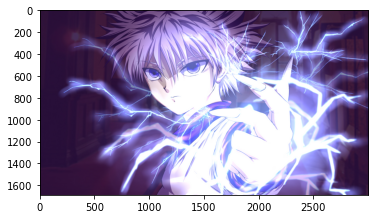

In [25]:
img_1 = mpimg.imread('resiim.jpg')
img_2 = convert_rgb_to_gray(img_1)
%matplotlib inline
plt.figure(figsize=(20,20))
plt.subplot(1,3,1),plt.imshow(img_1)

In [27]:
def get_median_for_55(poi):
    s1 = poi.reshape(1,25)  #1 e 25 lige donusturuyor
    s1.sort()
    return s1[0,13]
def get_median(poi): #3*3 luk bir blok için
    s1 = poi.reshape(1,9)
    s1.sort() #medyanı bulmak için sort işlemini yapıyor
    return s1[0,4]
def get_mean_filter_for_55(im_1):
    m = im_1.shape[0]
    n = im_1.shape[1]
    im_2 = np.zeros((m,n))
    
    for i in range (3,m-3):
        for j in range (3,n-3):
            poi = im_1[i-2:i+3,j-2:j+3]
            im_2[i,j] = get_median_for_55(poi)
    return im_2

def get_mean_filter(im_1):
    m = im_1.shape[0]
    n = im_1.shape[1]
    im_2 = np.zeros((m,n))
    
    for i in range (1,m-1):
        for j in range (1,n-1):
            poi = im_1[i-1:i+2,j-1:j+2]
            im_2[i,j] = get_median(poi)
    return im_2

In [29]:
apply_mask(img_2[1:4,1:4])

43.11225657126597

In [31]:
img_55 = get_mean_filter_for_55(img_2)

(<matplotlib.axes._subplots.AxesSubplot at 0x1ee1b83e310>,
 <matplotlib.image.AxesImage at 0x1ee224dcd60>)

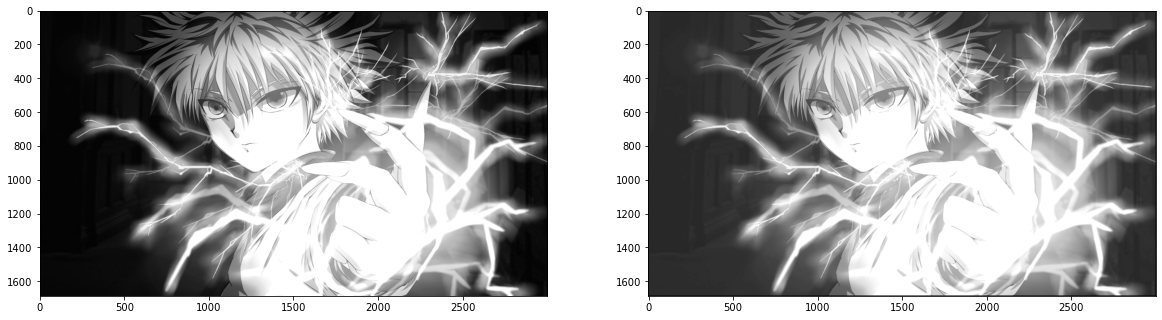

In [32]:
plt.figure(figsize=(20,20))
plt.subplot(1,2,1),plt.imshow(img_2, cmap = 'gray')
plt.subplot(1,2,2),plt.imshow(img_55, cmap = 'gray')